In [1]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
from wrangle_final import wrangle_zipcode_data, wrangle_gdf, clean_zcta_gdf, wrangle_metro_data

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [3]:
# get data
df = wrangle_zipcode_data()

In [4]:
# check it out
df.head()

,average_rent,min_rent,max_rent,num_properties,zip_code,two_bed_fmr,diff,percent_diff,afford_min,afford_avg,afford_max,affordability
date,,,,,,,,,,,,
2020-04-01,750.00,750,750,2,78002,890.0,-140.00,-15.730337,True,True,True,3
2020-04-01,898.82,625,1250,22,78221,900.0,-1.18,-0.131111,True,True,False,2
2020-04-01,860.00,625,1095,2,78222,970.0,-110.00,-11.340206,True,True,False,2
2020-04-01,916.40,800,1050,5,78219,980.0,-63.60,-6.489796,True,True,False,2
2020-04-01,1250.00,1250,1250,1,78052,720.0,530.00,73.611111,False,False,False,0


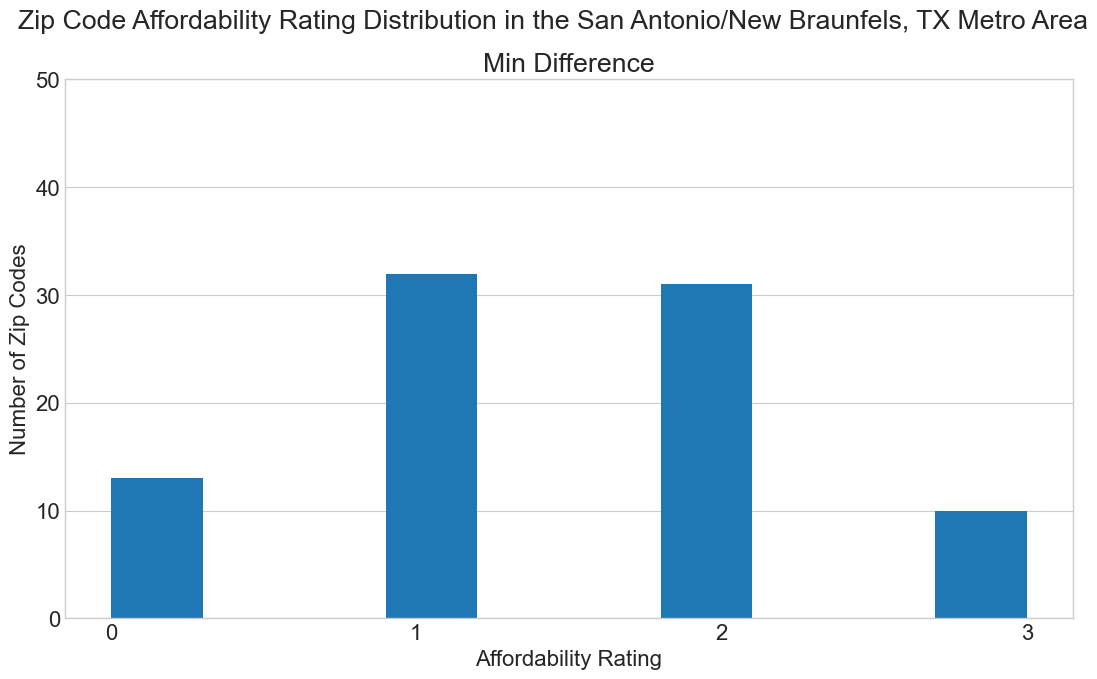

In [22]:
df.loc['2020-11'].affordability.hist()
plt.ylabel('Number of Zip Codes')
plt.xlabel('Affordability Rating')
plt.suptitle('Zip Code Affordability Rating Distribution in the San Antonio/New Braunfels, TX Metro Area')
plt.title('Min Difference')
plt.grid(axis='x')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xticks([0, 1, 2, 3])
plt.show()

In [ ]:
# trying out seaborn
min_difference = df.loc['2020-11']
min_difference

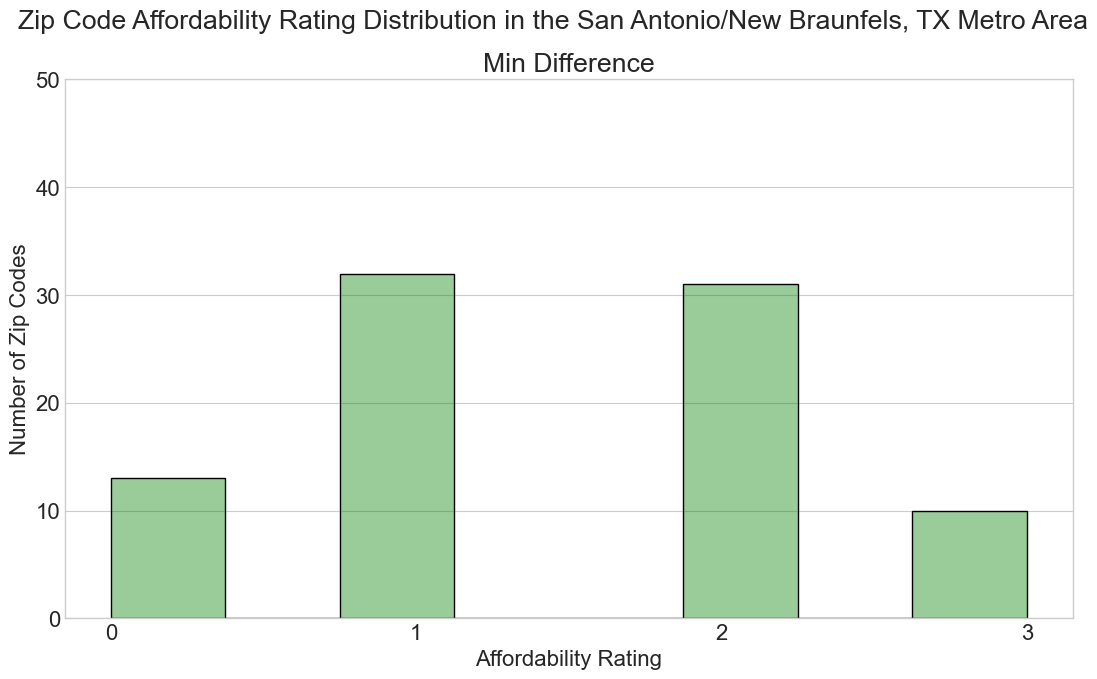

In [38]:
# getitng hist plot
sns.histplot(data = min_difference.reset_index(), x='affordability', color='green', alpha=.4)
plt.ylabel('Number of Zip Codes')
plt.xlabel('Affordability Rating')
plt.suptitle('Zip Code Affordability Rating Distribution in the San Antonio/New Braunfels, TX Metro Area')
plt.title('Min Difference')
plt.grid(axis='x')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xticks([0, 1, 2, 3])
plt.show()

In [27]:
# getting max differnce data
max_difference = df.loc['2022-08']

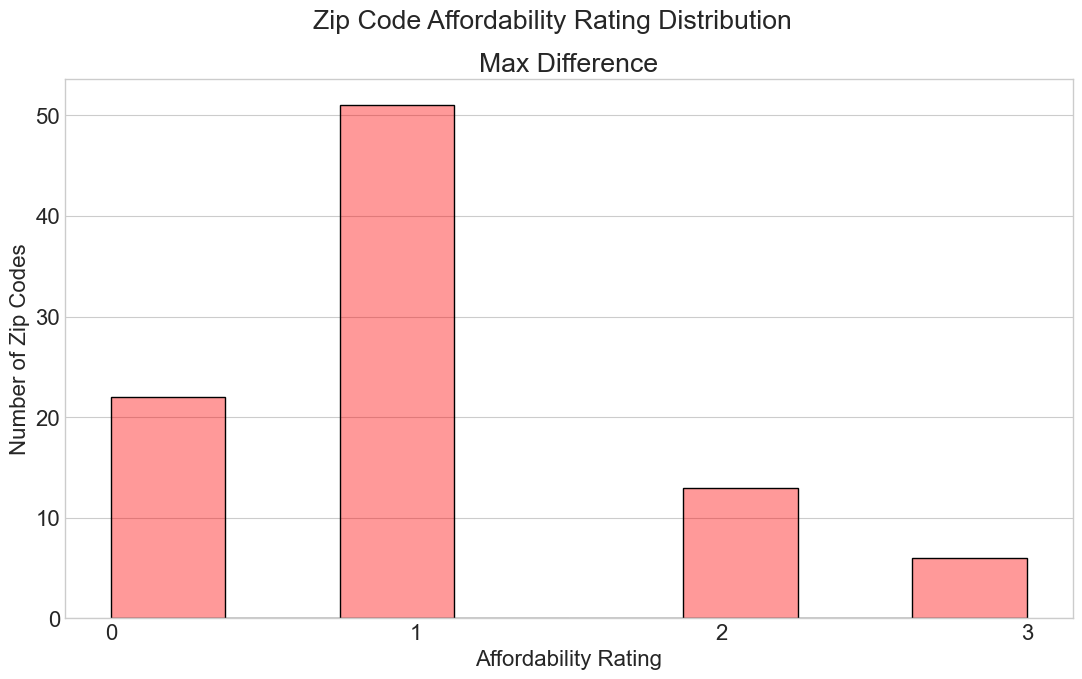

In [36]:
# getting the histogram for the data
sns.histplot(data = max_difference.reset_index(), x='affordability', color='red', alpha=.4)
plt.ylabel('Number of Zip Codes')
plt.xlabel('Affordability Rating')
plt.suptitle('Zip Code Affordability Rating Distribution')
plt.title('Max Difference')
plt.grid(axis='x')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xticks([0, 1, 2, 3])
plt.show()

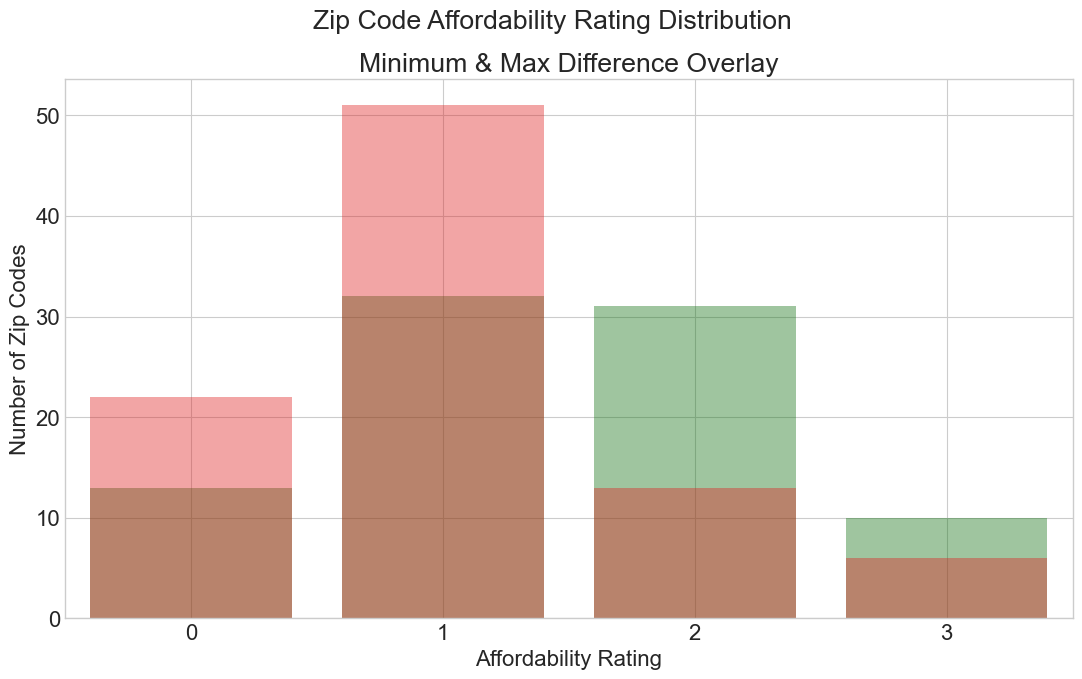

In [45]:
# combining both histograms

# minimum difference  hist
sns.countplot(data = min_difference.reset_index(), x='affordability', color='green', alpha=.4)

# maximum diff hist
sns.countplot(data = max_difference.reset_index(), x='affordability', color='red', alpha=.4)

# labels and titles
plt.ylabel('Number of Zip Codes')
plt.xlabel('Affordability Rating')


plt.suptitle('Zip Code Affordability Rating Distribution')
plt.title('Minimum & Max Difference Overlay')
plt.grid(axis='x')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xticks([0, 1, 2, 3])

plt.show()

In [144]:
# going to experieemt with combining box minimum and maximum diffrence, make the date a column, and set the hue to the date in the count plot

min_max = pd.concat([min_difference, max_difference])

In [62]:
# make date columns
min_max['year'] = min_max.index.year

In [49]:
print(sns.color_palette("Set1"))

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745), (0.21568627450980393, 0.49411764705882355, 0.7215686274509804), (0.30196078431372547, 0.6862745098039216, 0.2901960784313726), (0.596078431372549, 0.3058823529411765, 0.6392156862745098), (1.0, 0.4980392156862745, 0.0), (1.0, 1.0, 0.2), (0.6509803921568628, 0.33725490196078434, 0.1568627450980392), (0.9686274509803922, 0.5058823529411764, 0.7490196078431373), (0.6, 0.6, 0.6)]


In [124]:
print(sns.color_palette("dark").as_hex())

['#001c7f', '#b1400d', '#12711c', '#8c0800', '#591e71', '#592f0d', '#a23582', '#3c3c3c', '#b8850a', '#006374']


In [103]:
min_max.reset_index()['date'].value_counts()

2022-08-01    92
2020-11-01    86
Name: date, dtype: int64

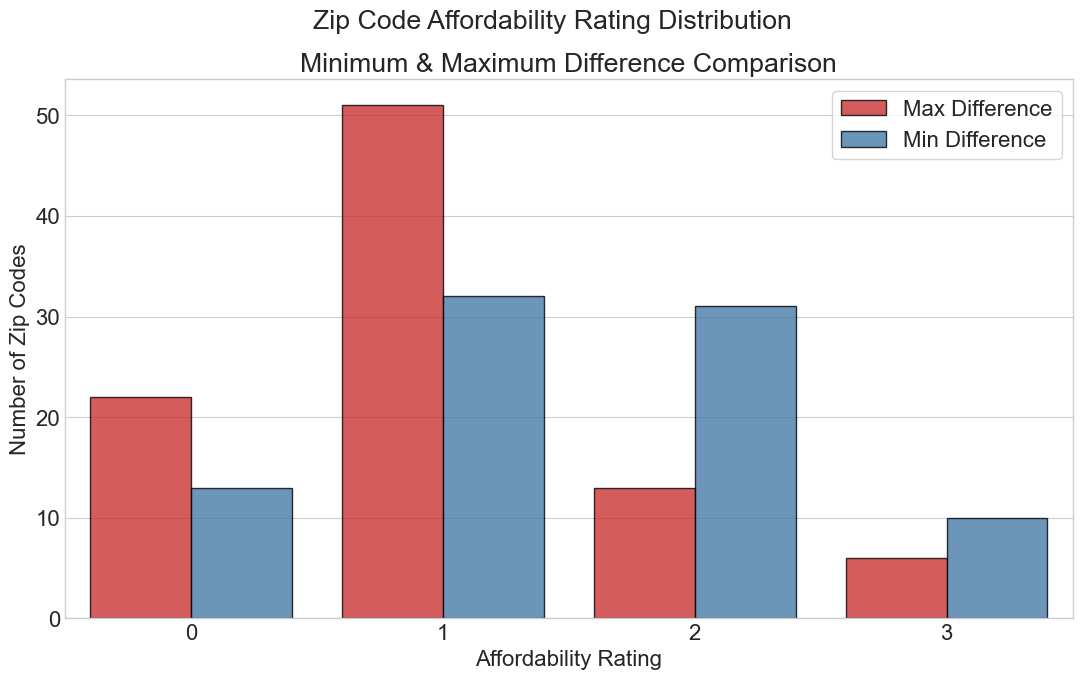

In [136]:
# minimum difference  hist
sns.set_palette("Set1")

hue_order = ['2022-08-01', '2020-11-01']
sns.countplot(data = min_max.reset_index(), x='affordability', hue='date', hue_order=hue_order, ec = 'black', alpha=.8)

# labels and titles
plt.ylabel('Number of Zip Codes')
plt.xlabel('Affordability Rating')


plt.suptitle('Zip Code Affordability Rating Distribution')
plt.title('Minimum & Maximum Difference Comparison')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xticks([0, 1, 2, 3])
plt.legend(labels=['Max Difference', 'Min Difference'], frameon=True)

plt.show()

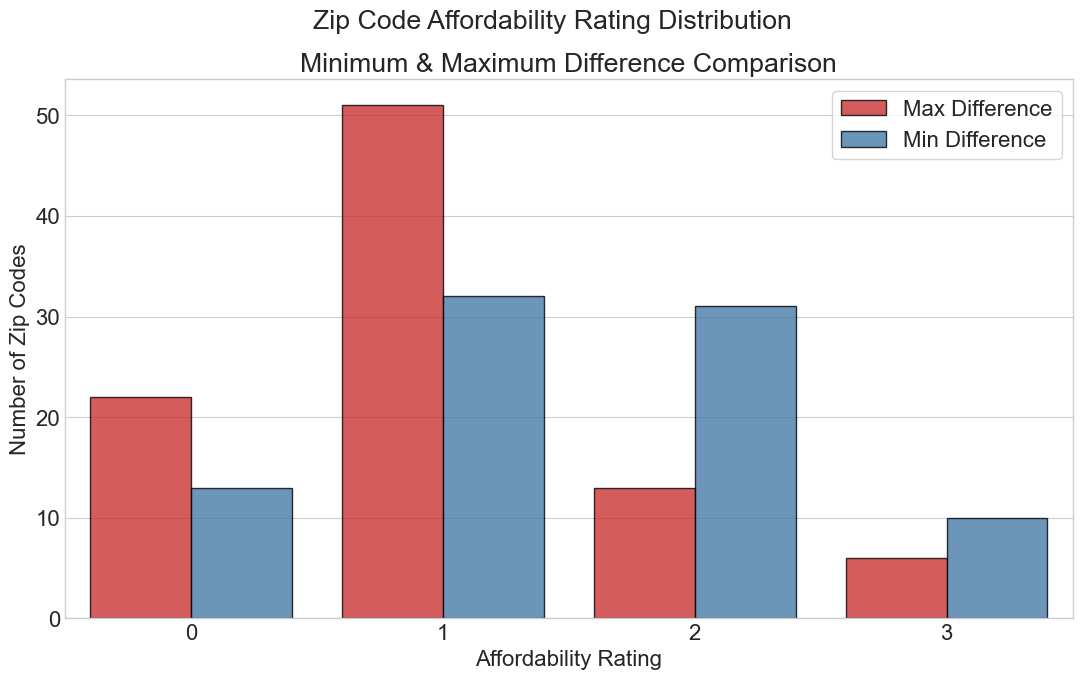

In [149]:
# make a function
def get_min_max_comparison():
    '''
    Arguments: None
    Actions: This function loads data for the days with the minimum and maximum difference and creats a countplot to compare them side by side
    '''
    # get data
    df = wrangle_zipcode_data()
    min_max = df.loc[['2022-08', '2020-11']]

    # set pallete
    sns.set_palette("Set1")

    # assign hue order
    hue_order = ['2022-08-01', '2020-11-01']

    # create a count plot with affordability
    sns.countplot(data = min_max.reset_index(), x='affordability', hue='date', hue_order=hue_order, ec = 'black', alpha=.8)

    # labels and titles
    plt.ylabel('Number of Zip Codes')
    plt.xlabel('Affordability Rating')
    plt.suptitle('Zip Code Affordability Rating Distribution')
    plt.title('Minimum & Maximum Difference Comparison')

    # set ticks
    plt.yticks([0, 10, 20, 30, 40, 50])
    plt.xticks([0, 1, 2, 3])

    # create a legend with a border
    plt.legend(labels=['Max Difference', 'Min Difference'], frameon=True)

    # put it all together and shjow
    plt.show()
    
    return

In [141]:
min_max

,average_rent,min_rent,max_rent,num_properties,zip_code,two_bed_fmr,diff,percent_diff,afford_min,afford_avg,afford_max,affordability,year
date,,,,,,,,,,,,,
2020-11-01,1630.00,1345,2250,4,78260,1670.0,-40.00,-2.395210,True,True,False,2,2020
2020-11-01,1481.40,799,2250,45,78204,1000.0,481.40,48.140000,True,False,False,1,2020
2020-11-01,1208.98,680,2195,111,78229,1180.0,28.98,2.455932,True,False,False,1,2020
2020-11-01,911.14,790,1067,7,78227,970.0,-58.86,-6.068041,True,True,False,2,2020
2020-11-01,1200.00,1200,1200,1,78252,1370.0,-170.00,-12.408759,True,True,True,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,2149.52,1200,3100,23,78215,1640.0,509.52,31.068293,True,False,False,1,2022
2022-08-01,1283.11,870,2175,27,78155,1030.0,253.11,24.573786,True,False,False,1,2022
2022-08-01,986.10,850,1250,10,78227,1020.0,-33.90,-3.323529,True,True,False,2,2022


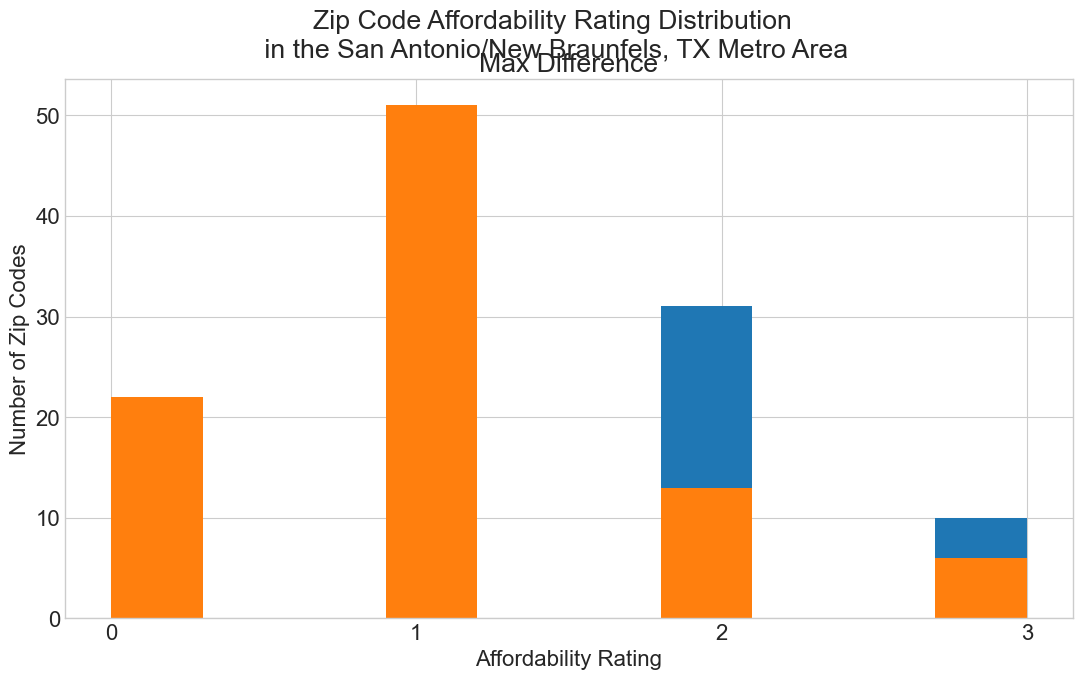

In [14]:
df.loc['2022-08'].affordability.hist()
plt.ylabel('Number of Zip Codes')
plt.xlabel('Affordability Rating')
plt.suptitle('Zip Code Affordability Rating Distribution\n in the San Antonio/New Braunfels, TX Metro Area')
plt.title('Max Difference')
plt.xticks([0, 1, 2, 3])

plt.show()

In [ ]:
df.affordability.hist()
plt.ylabel('Number of Zip Codes')
plt.xlabel('Affordability Rating')
plt.suptitle('Zip Code Affordability Rating Distribution\n in the San Antonio/New Braunfels, TX Metro Area')
plt.title('From 2020')
plt.xticks([0, 1, 2, 3])
plt.grid(axis='x')
plt.tight_layout()

plt.show()

df.loc['2023-05'].affordability.hist()
plt.ylabel('Number of Zip Codes')
plt.xlabel('Affordability Rating')
plt.suptitle('Zip Code Affordability Rating Distribution\n in the San Antonio/New Braunfels, TX Metro Area')
plt.title('Current')
plt.xticks([0, 1, 2, 3])
plt.grid(axis='x')
plt.tight_layout()

plt.show()

In [152]:
gdf = wrangle_gdf()

In [153]:
gdf

,affordability,num_properties,geometry
zip_code,,,
78148,2,17,"POLYGON ((-98.33303 29.56820, -98.33140 29.569..."
78257,1,14,"POLYGON ((-98.65716 29.70703, -98.65699 29.707..."
78154,2,11,"POLYGON ((-98.34173 29.58579, -98.33631 29.589..."
78152,3,2,"POLYGON ((-98.27022 29.43175, -98.26780 29.431..."
78124,1,5,"POLYGON ((-98.21084 29.60410, -98.20624 29.606..."
...,...,...,...
78606,0,1,"POLYGON ((-98.71107 30.11579, -98.70896 30.116..."
78010,0,1,"POLYGON ((-99.17946 29.90463, -99.17946 29.904..."
78261,2,4,"POLYGON ((-98.45205 29.69366, -98.45200 29.694..."


#### Actions:
* create new column that shows the affordability for the min diff day and another column for affordability on the max_diff day 

In [165]:
# getting affordability df
min_max_afford = min_difference[['zip_code', 'affordability']].rename({'affordability':'min_affordability'}, axis=1)\
.merge(max_difference[['zip_code', 'affordability']].rename({'affordability': 'max_affordability'}, axis=1))

In [176]:
# create difference columns
min_max_afford['difference'] = min_max_afford['min_affordability'] - min_max_afford['max_affordability']

In [265]:
# 0 means no change
# positive difference means a drop in affordability
# negative difference means ann increase in affordability
min_max_afford['Affordability'] = np.where(min_max_afford['difference'] == 0, 'No Change', np.where(min_max_afford['difference'] > 0, 'Less Affordable', 'More Affordable'))

# min_max_afford['difference'] > 0

# min_max_afford['difference'] < 0

In [274]:
gdf = clean_zcta_gdf()

In [276]:
# gdf

In [269]:
gdf = clean_zcta_gdf()
    
# columns of interest
cols = ['zip_code', 'Affordability']

# merging data
gdf = min_max_afford[cols].merge(gdf, how='inner', on='zip_code')

# setting index to zipcode
gdf = gdf.set_index('zip_code')

# set to gdf
gdf = geopandas.GeoDataFrame(gdf)

In [270]:
gdf.head()

,Affordability,geometry
zip_code,,
78260,No Change,"POLYGON ((-98.55118 29.68360, -98.55114 29.683..."
78204,No Change,"POLYGON ((-98.53103 29.39716, -98.53093 29.397..."
78229,No Change,"POLYGON ((-98.59613 29.48899, -98.59588 29.490..."
78227,No Change,"POLYGON ((-98.69015 29.38381, -98.69012 29.383..."
78252,Less Affordable,"POLYGON ((-98.78018 29.32943, -98.77816 29.329..."


In [234]:
def my_colormap(value):  # scalar value defined in 'column'
    if value == 'no change':
        return "gray"
    return 'green'
    

In [250]:
legend_kwds = {'colorbar': False,
              'labels': ['Less Affordable', 'More Affordable', 'No Change']}
# Additional keywords to be passed to the legend.
# Currently supported customisation:
# caption
# string
# Custom caption of the legend. Defaults to the column name.
# Additional accepted keywords when scheme is specified:
# colorbar
# bool (default True

In [ ]:
[‘red’, ‘blue’, ‘green’, ‘purple’, ‘orange’, ‘darkred’,
’lightred’, ‘beige’, ‘darkblue’, ‘darkgreen’, ‘cadetblue’, ‘darkpurple’, ‘white’, ‘pink’, ‘lightblue’, ‘lightgreen’, ‘gray’, ‘black’, ‘lightgray’]

In [259]:
# import contextily as cx

In [260]:
# cx.add_basemap(ax, crs=df.crs.to_string(), source=cx.providers.Stamen.TonerLite)

In [272]:
gdf.explore('Affordability', cmap=cmap, legend_kwds=legend_kwds).save('affordability_change_map.html')
# plt.savefig('affordability_change_map.html')

In [ ]:
gdf.plot()

In [238]:
from matplotlib.colors import ListedColormap

In [239]:
cmap = ListedColormap(['red', 'green', 'lightgray'])

In [173]:
# any nulls
min_max_afford.isna().sum()

zip_code             0
min_affordability    0
max_affordability    0
dtype: int64

In [288]:
# gdf = clean_zcta_gdf()
gdf.explore(color='red', scheme="naturalbreaks").save('sanb_map.html')

# When was the difference the lowest/the highest?

In [2]:
metro, t, v, te = wrangle_metro_data()

/Users/aaron/codeup-data-science/project_repo/a_moore/wrangle_final.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['mmr']= df['mmr'].str.replace('$','').str.replace(',','').astype(int)


In [4]:
# check
metro.head()

,fmr,mmr,diff,percent_diff
2017-01-01,964.0,1019.0,55.0,5.705394
2017-02-01,964.0,1014.0,50.0,5.186722
2017-03-01,964.0,1040.0,76.0,7.883817
2017-04-01,964.0,1044.0,80.0,8.298755
2017-05-01,964.0,1012.0,48.0,4.979253


In [6]:
#  looking at the column name when index reset
metro.reset_index()

,index,fmr,mmr,diff,percent_diff
0,2017-01-01,964.0,1019.0,55.0,5.705394
1,2017-02-01,964.0,1014.0,50.0,5.186722
2,2017-03-01,964.0,1040.0,76.0,7.883817
3,2017-04-01,964.0,1044.0,80.0,8.298755
4,2017-05-01,964.0,1012.0,48.0,4.979253
...,...,...,...,...,...
70,2022-11-01,1286.0,1495.0,209.0,16.251944
71,2022-12-01,1286.0,1502.0,216.0,16.796267
72,2023-01-01,1286.0,1502.0,216.0,16.796267
73,2023-02-01,1286.0,1500.0,214.0,16.640747


In [54]:
# seleacting color to match
print(sns.color_palette("Set1"))

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745), (0.21568627450980393, 0.49411764705882355, 0.7215686274509804), (0.30196078431372547, 0.6862745098039216, 0.2901960784313726), (0.596078431372549, 0.3058823529411765, 0.6392156862745098), (1.0, 0.4980392156862745, 0.0), (1.0, 1.0, 0.2), (0.6509803921568628, 0.33725490196078434, 0.1568627450980392), (0.9686274509803922, 0.5058823529411764, 0.7490196078431373), (0.6, 0.6, 0.6)]


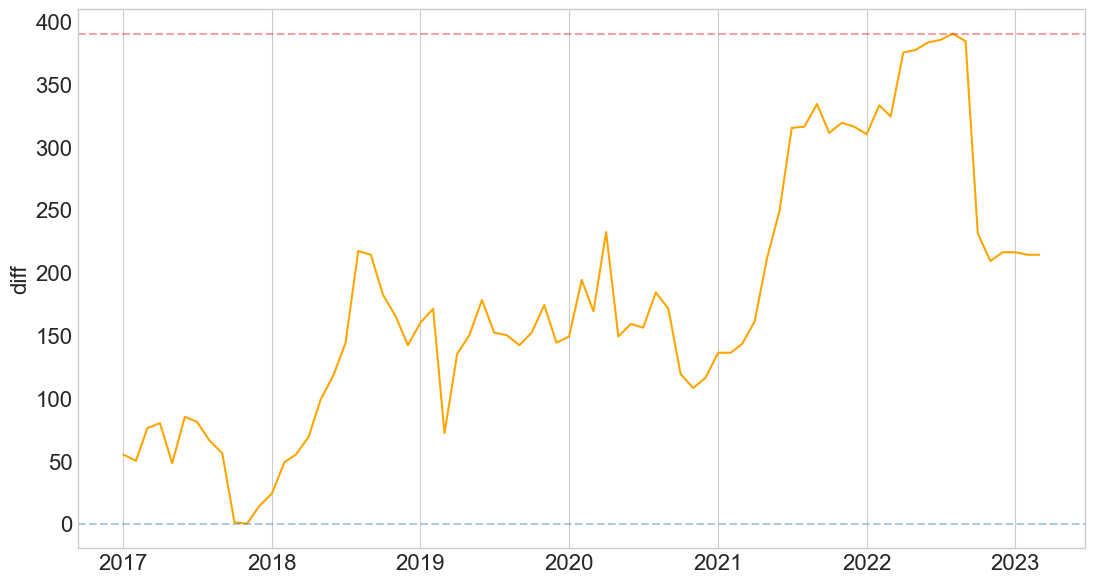

In [60]:
# Graphing the highest and lowest differences that occurred
sns.lineplot(data=metro,x=metro.index, y='diff', color='orange')
plt.axhline(y=metro['diff'].min(),
            color=(0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
            linestyle='--',
            alpha=.4
           )
plt.axhline(y=metro['diff'].max(),
            color=(0.8941176470588236, 0.10196078431372549, 0.10980392156862745), 
            linestyle='--', 
            alpha=.4
           )
plt.grid(axis='y')
plt.show()

In [36]:
# Graph the difference in a historgam looking thing
# sns.relplot(data=metro.reset_index(), x='index', y='diff' )

In [37]:
# Graph the difference in a historgam looking thing
# sns.catplot(data=metro.reset_index(), x='index', y='diff' )

# Zip code data

In [11]:
# get sipcode data
zipcode = wrangle_zipcode_data()

In [12]:
# 
zipcode.head()

,average_rent,min_rent,max_rent,num_properties,zip_code,two_bed_fmr,diff,percent_diff,afford_min,afford_avg,afford_max,affordability
date,,,,,,,,,,,,
2020-04-01,750.00,750,750,2,78002,890.0,-140.00,-15.730337,True,True,True,3
2020-04-01,898.82,625,1250,22,78221,900.0,-1.18,-0.131111,True,True,False,2
2020-04-01,860.00,625,1095,2,78222,970.0,-110.00,-11.340206,True,True,False,2
2020-04-01,916.40,800,1050,5,78219,980.0,-63.60,-6.489796,True,True,False,2
2020-04-01,1250.00,1250,1250,1,78052,720.0,530.00,73.611111,False,False,False,0


# get a count plot of affordability

<AxesSubplot:xlabel='affordability', ylabel='count'>

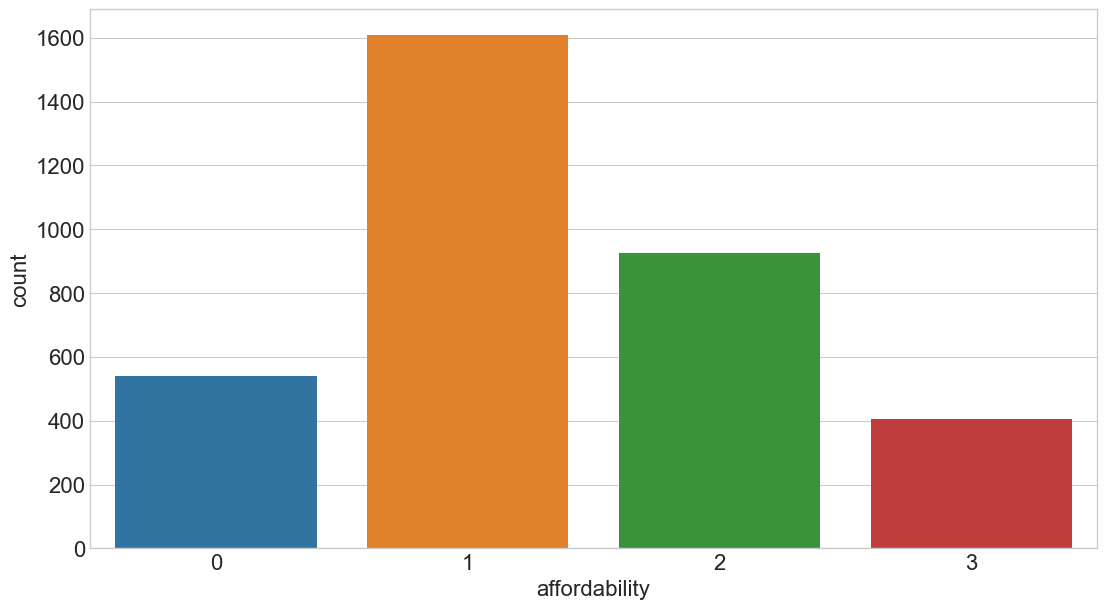

In [14]:
# majority of afforability falls under one, being able to afford the minimum rent 
sns.countplot(data=zipcode, x='affordability')

# View affordability changes over time 

In [17]:
# set y
y = zipcode['affordability']

In [62]:
# I need rofigure the data to chow the average monthly for the area
# y.plot()

#

# How are difference and affordability related?

In [65]:
# monthly affora
y = zipcode.groupby(zipcode.index)['affordability'].mean()

date
2020-04-01    1.400000
2020-05-01    1.284091
2020-06-01    1.411111
2020-07-01    1.377778
2020-08-01    1.395349
2020-09-01    1.397590
2020-10-01    1.459770
2020-11-01    1.441860
2020-12-01    1.465116
2021-01-01    1.523810
2021-02-01    1.482353
2021-03-01    1.518072
2021-04-01    1.500000
2021-05-01    1.512195
2021-06-01    1.518072
2021-07-01    1.384615
2021-08-01    1.382022
2021-09-01    1.382022
2021-10-01    1.584270
2021-11-01    1.563218
2021-12-01    1.576471
2022-01-01    1.333333
2022-02-01    1.301205
2022-03-01    1.137931
2022-04-01    1.104651
2022-05-01    1.146067
2022-06-01    1.010753
2022-07-01    1.000000
2022-08-01    1.032609
2022-09-01    1.043011
2022-10-01    1.318681
2022-11-01    1.325843
2022-12-01    1.279070
2023-01-01    1.384615
2023-02-01    1.314607
2023-03-01    1.322222
2023-04-01    1.369565
2023-05-01    1.274725
2023-06-01    1.293103
Name: affordability, dtype: float64

In [2]:
# getting data
df, train, validate, test = wrangle_metro_data()

# assigning target
y = df['diff']

def get_disparity_graph():
    '''
    This function gets the line graph showing the MMR and FMR cost changes over time
    '''
    
    # plot the mmr and fmr lines
    df.mmr.plot(label='Median Market Rent')
    df.fmr.plot(label='Fair Market Rent (40%)')
    plt.fill_between(df.index, df.mmr, df.fmr, color='red', alpha=0.1)
    
    # get a border on the legend
    plt.legend(frameon=True)
    
    # set the title and axis labels
    plt.ylabel('Amount in Dollars')
    plt.xlabel('Year')
    plt.title('Disparity between MMR and FMR Amounts')
    
    # show the chart
    plt.show()
    
    return

/Users/aaron/codeup-data-science/project_repo/a_moore/wrangle_final.py:96: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['mmr']= df['mmr'].str.replace('$','').str.replace(',','').astype(int)


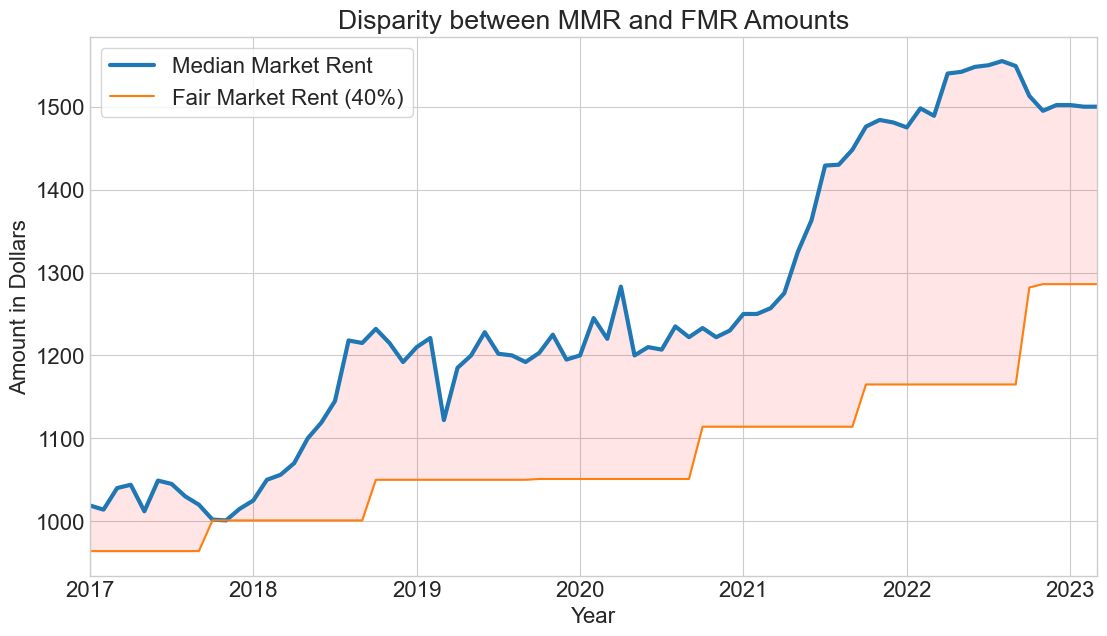

In [21]:
# plot the mmr and fmr lines
df.mmr.plot(label='Median Market Rent', linewidth=3)
df.fmr.plot(label='Fair Market Rent (40%)')
plt.fill_between(df.index, df.mmr, df.fmr, color='red', alpha=0.1)

# get a border on the legend
plt.legend(frameon=True)

# set the title and axis labels
plt.ylabel('Amount in Dollars')
plt.xlabel('Year')
plt.title('Disparity between MMR and FMR Amounts')

plt.savefig('mmr_bolded.jpg', dpi=1000)
# show the chart
plt.show('mmr_bolded.jpg')

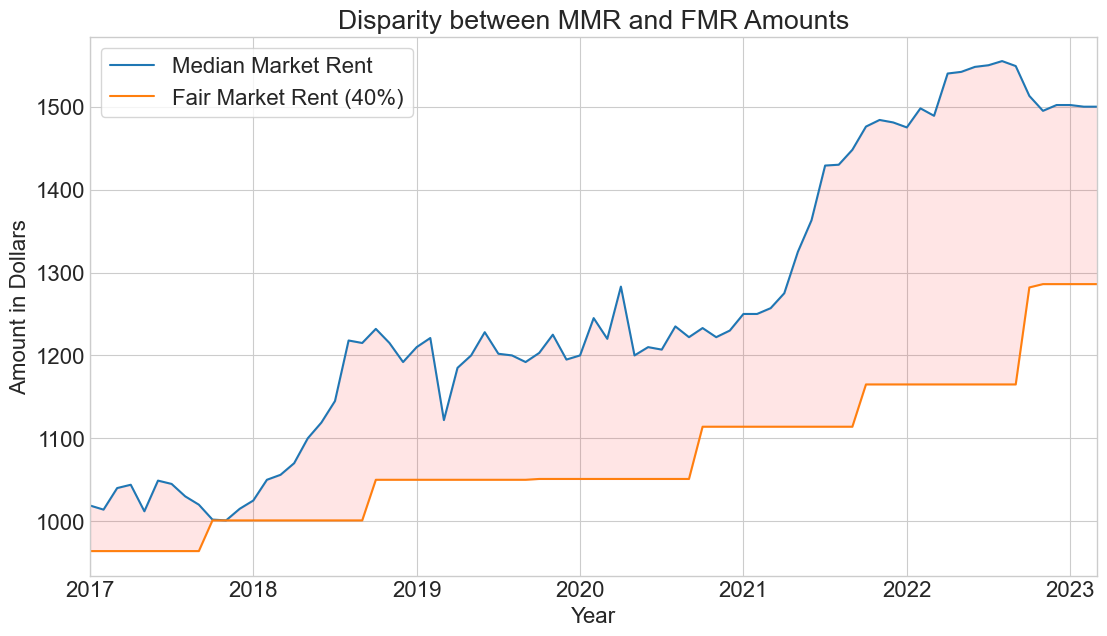

In [23]:
# plot the mmr and fmr lines
df.mmr.plot(label='Median Market Rent')
df.fmr.plot(label='Fair Market Rent (40%)')
plt.fill_between(df.index, df.mmr, df.fmr, color='red', alpha=0.1)

# get a border on the legend
plt.legend(frameon=True)

# set the title and axis labels
plt.ylabel('Amount in Dollars')
plt.xlabel('Year')
plt.title('Disparity between MMR and FMR Amounts')

plt.savefig('fmr_mmr_normal.jpg', dpi=1000)
# show the chart
plt.show()

In [14]:
fig1